## Полезные задачки для дальнейшей работы с искусственными нейронными сетями

## Работа с изображениями

Все изображения представляют собой матрицы чисел (или многомерные векторы), которые кодируют цвета отдельных пикселей. Для изображений высоты $H$, ширины $W$ с $C$ цветовыми каналами получаем упорядоченный набор  $H \times W \times C$ чисел.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/img_to_array.png" width="1000" >

Например, датасет CIFAR-10 содержит цветные (трехцветные) изображения размером $32 \times 32$ пикселя. Таким образом, каждое изображение из датасета является точкой в $3072$-мерном ($32 \times 32 \times 3 = 3072$) вещественном пространстве.

То есть все изображения по сути являются векторами, заполненными числами. В python есть несколько бибилиотек, которые отвечают за работу с векторами. Самыми часто используемыми для нейронных сетей -- библиотеки numpy и PyTorch.

Посмотрим на одну из цифр из набора данных MNIST, как её видим мы:

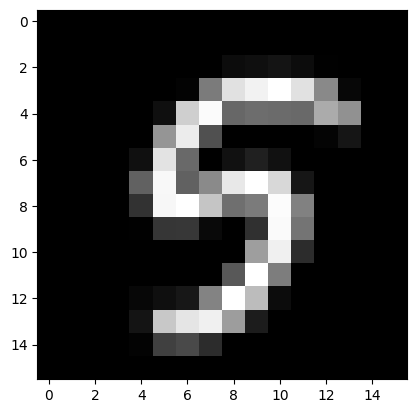

In [ ]:
import numpy as np
from PIL import Image
from torchvision import utils
import matplotlib.pyplot as plt

image = Image.open(r"/content/digit.png")
img_np = np.array(image)
plt.imshow(img_np, cmap="gray")
plt.show()

И как она записана в компьютере -- в виде набора векторов (матрицы):

In [ ]:
print(img_np)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  15  20  12   1   0   0   0]
 [  0   0   0   0   0   0   3 123 225 242 255 225 137   7   0   0]
 [  0   0   0   0   0  15 207 251 103 109 107 105 171 145   0   0]
 [  0   0   0   0   0 149 236  80   0   0   0   0   4  21   0   0]
 [  0   0   0   0  16 228 106   0  17  33  17   0   0   0   0   0]
 [  0   0   0   0  97 248  98 138 232 255 216  22   0   0   0   0]
 [  0   0   0   0  50 247 255 197 111 123 252 129   0   0   0   0]
 [  0   0   0   0   1  54  55   9   0  49 250 116   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 240  44   0   0   0   0]
 [  0   0   0   0   0   0   0   0  88 255 125   0   0   0   0   0]
 [  0   0   0   0   7  15  23 132 255 188  12   0   0   0   0   0]
 [  0   0   0   0  20 200 229 240 157  28   0   0   0   0   0   0]
 [  0   0   0   0   3  64  73  45   0   0   0   0   0   0   0 

Подключить библиотеки numpy (для более короткой записи кода и простоты её полное название сокращают до np) и torch, чтобы обеспечить работу с векторами:

In [2]:
import numpy as np
import torch

Рассмотрим основные операции для работы с тензорами.
Создать экземпляр класса [Tensor](https://pytorch.org/docs/stable/tensors.html#torch.Tensor).
Определение из документации: A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [3]:
e = torch.Tensor()
e

tensor([])

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести его тип при помощи функции type.

In [5]:
a = torch.tensor([1.1, 2.2, 3.2])
a.type()

'torch.FloatTensor'

Вопрос: чем принципиально отличаются записи a = torch.Tensor() и b = torch.tensor()? Что будет на выходе для a и для b?

In [ ]:
a = torch.Tensor()
print('a: ', a)
b = torch.tensor()
print("b: ", b)

# во втором случае необходимо передавать данные

a:  tensor([])


TypeError: ignored

Создать тензор [1.1, 2.2, 3.2] указанного типа float64. Использовать параметр dtype:

In [7]:
a = torch.tensor([1.1, 2.2, 3.2], dtype = torch.float64)
a.dtype

torch.float64

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести тип данных, которые помещены в тензор. Для этого так же использовать dtype.

In [6]:
a = torch.tensor([1.1, 2.2, 3.2])
a.dtype

torch.float32

Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [ ]:
a = torch.full((3, 2), 2.5)
a


tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Создать тензор размерности $3 \times 2$ и заполнить его единицами.

In [ ]:
a = torch.ones(3, 2)
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Создать тензор размерности $2 \times 3 \times 4$ и заполнить его нулями.

In [ ]:
b = torch.zeros(2, 3, 4)
b

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Создать тензор размерности 3 строки и 4 стоблца, заполненный случайными числами.

In [14]:
x = torch.randn(3, 4)
x

tensor([[ 0.9708,  0.4275,  1.3555,  0.6072],
        [-0.3951, -1.0256,  0.1620,  1.2682],
        [ 1.0571, -0.3184, -1.1282,  0.4067]])

Создать тензор - вектор размерности $1 \times 5$, заполненный целыми случайными числами от 0 до 100.

In [12]:
y = torch.randint(0, 101, (1, 5))
print(y)

tensor([[ 9, 33, 52, 67, 35]])


Создать вектор размерности $2 \times 3$ и заполнить его целыми числами от -10 до 10.

In [13]:
a = torch.randint(-10, 11, (2, 3))
a

tensor([[-4, -4,  5],
        [-5,  6, -3]])

Для того, чтобы все величины, которые мы создаём при помощи датчика случайных чисел, создались один раз и не изменяли своего значения, надо зафиксировать базовое число --- это делается при помощи функции torch.manual_seed().
Функция torch.randn_like(x) возвращает тензор того же размера, что и x, который заполнен случайными числами из нормального распределения со средним 0 и дисперсией 1.

In [ ]:
torch.manual_seed(7)
a = torch.randn(1, 5)
b = torch.randn_like(a)
print(f'a = {a},\nb = {b}'.format(a, b))

a = tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]),
b = tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])


Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [15]:
a = torch.full((3, 2), 2.5)
a

tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Для выполнения операций умножения на веса или на матрицы свёрток (для свёрточных нейронных сетей), необходимо вытянуть матрицу, которой представлено изображение:

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 15, 20, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 123, 225, 242, 255, 225, 137, 7, 0, 0, 0, 0, 0, 0, 0, 15, 207, 251, 103, 109, 107, 105, 171, 145, 0, 0, 0, 0, 0, 0, 0, 149, 236, 80, 0, 0, 0, 0, 4, 21, 0, 0, 0, 0, 0, 0, 16, 228, 106, 0, 17, 33, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 248, 98, 138, 232, 255, 216, 22, 0, 0, 0, 0, 0, 0, 0, 0, 50, 247, 255, 197, 111, 123, 252, 129, 0, 0, 0, 0, 0, 0, 0, 0, 1, 54, 55, 9, 0, 49, 250, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158, 240, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 255, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 15, 23, 132, 255, 188, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 200, 229, 240, 157, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 64, 73, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


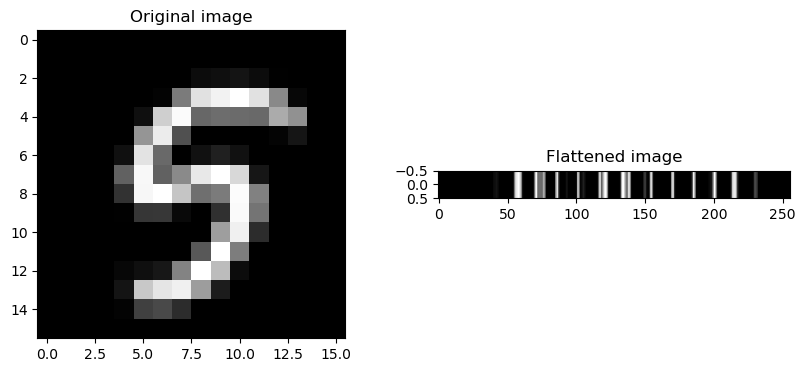

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(img_np, cmap="gray")
ax[1].imshow(img_np.reshape(1, -1), aspect=20, cmap="gray")
ax[0].set_title("Original image")
ax[1].set_title("Flattened image")

vector = np.array(image).flatten()
print(list(vector))

Вытянуть тензор в одну линию можно при помощи функции flatten:

In [20]:
t = torch.tensor([ [[1, 2], [3, 4]], [[5, 6], [7, 8]] ])
print(t.shape)
print(torch.flatten(t))

torch.Size([2, 2, 2])
tensor([1, 2, 3, 4, 5, 6, 7, 8])


Можно добавить в функцию flatten параметры, показывающие, с какого измерение по какое спрямлять тензор:

In [21]:
t_new = torch.flatten(t, start_dim=0, end_dim=1)
print(t_new, t_new.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]) torch.Size([4, 2])


Ещё есть возможность, позволяющая представить вектор x в виде одномерного вектора (вытянуть в линию и в столбик все значения x) при помощи функции view:

In [24]:
x_row = x.view(-1, 12)
x_column = x.view(12, -1)
print(x_row,'\n',x_column)

tensor([[ 0.9708,  0.4275,  1.3555,  0.6072, -0.3951, -1.0256,  0.1620,  1.2682,
          1.0571, -0.3184, -1.1282,  0.4067]]) 
 tensor([[ 0.9708],
        [ 0.4275],
        [ 1.3555],
        [ 0.6072],
        [-0.3951],
        [-1.0256],
        [ 0.1620],
        [ 1.2682],
        [ 1.0571],
        [-0.3184],
        [-1.1282],
        [ 0.4067]])


В целом функция view может поменять форму тензора на любую допустимую. Изменить форму вектора x на $2 \times 6$.


In [25]:
x = torch.randn(2,6)
x

tensor([[-0.4630,  0.2978,  1.9890,  1.1713, -0.2907, -0.8469],
        [ 1.3474,  0.2039, -0.9274,  0.9313,  1.1990,  0.1712]])

## Операции умножения внутри нейрона

Модель нейрона взята из биологии и структура повторяет процесс передачи информации через нейрон. Входной сигнал обрабатывается и дальше принимается решение, насколько он важен и передавать ли его дальше.

<img src ="https://upload.wikimedia.org/wikipedia/commons/b/b5/Neuron.svg" width="1000" >


Та же логика ипользовалась при создании модели искусственного нейрона: входные данные умножаются на веса, передаются функции активации, которая их преобразует и передаёт дальше:

https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w02/terms.html

При перемножении заданных значений на веса необходимо использовать векторное произведение.
Создать два тензора размера $2 \times 3$ и $3 \times 5$ и векторно перемножить их. Вывести на экран результирующий тензор и его размерность.

In [27]:
a = torch.randn(2, 3)
b = torch.randn(3, 5)
res = torch.mm(a, b)
print(res,'\n',res.shape)

tensor([[-0.0863, -1.1872,  0.0931,  0.9670,  0.5927],
        [-0.2470, -1.8195,  0.3130, -0.8410, -0.2757]]) 
 torch.Size([2, 5])


При умножении на веса бывает необходимо транспонировать данные (поменять порядок расположения осей).
Изменить порядок расположения осей тензора x (транспонировать) можно двумя способами: при помощи  метода T и функции transpose().

In [28]:
x = torch.randn(2, 6)
a = x.T
print(x)
print(a)
b = torch.transpose(x, 0, 1)  # номера осей, которые будем менять местами
print(b)

tensor([[ 0.6339,  0.6590,  2.0403, -1.0917, -0.7609,  2.0059],
        [ 0.2134, -0.7572,  0.7338, -1.0153, -1.0628, -0.3431]])
tensor([[ 0.6339,  0.2134],
        [ 0.6590, -0.7572],
        [ 2.0403,  0.7338],
        [-1.0917, -1.0153],
        [-0.7609, -1.0628],
        [ 2.0059, -0.3431]])
tensor([[ 0.6339,  0.2134],
        [ 0.6590, -0.7572],
        [ 2.0403,  0.7338],
        [-1.0917, -1.0153],
        [-0.7609, -1.0628],
        [ 2.0059, -0.3431]])


Найти сумму всех элементов тензора a.

In [29]:
a.sum()

tensor(1.2553)

Найти сумму всех элементов тензора a по строкам.

In [30]:
a.sum(0)

tensor([ 3.4865, -2.2312])

Найти сумму всех элементов тензора a по столбцам.

In [31]:
a.sum(1)

tensor([ 0.8473, -0.0981,  2.7741, -2.1070, -1.8237,  1.6628])

Найти максимальные значения вектора x по столбцам и строкам при помощи функции max.

In [32]:
rows =  torch.max(a, 0).values
columns =  torch.max(a, 1).values
print(f"rows:\n {rows}, \ncolumns: \n {columns}".format(rows, columns))

rows:
 tensor([2.0403, 0.7338]), 
columns: 
 tensor([ 0.6339,  0.6590,  2.0403, -1.0153, -0.7609,  2.0059])


Создать два тензора [[5, 0, 1], [6, 0, 2]] и [[2, 3, 0], [3, 4, 5]]. Найти максимум из двух тензоров на каждом месте при помощи функции maximum:

In [33]:
a = torch.tensor([[5, 0, 1], [6, 0, 2]])
b = torch.tensor([[2, 3, 0], [3, 4, 5]])
torch.maximum(a, b)

tensor([[5, 3, 1],
        [6, 4, 5]])

В разных библиотеках наборы данных изображений обрабатываются в разных форматах:

OpenCV, TensorFlow, Pillow, etc. : `Batch x Height x Width x Channels`

PyTorch : `Batch x Channels x Height x Width`

Поэтому периодически возникает необходимость менять местами измерения или убирать какие-то измерения.

Создать тензор a размерности $(2, 5, 1, 8)$, заполнить его нулями и поменять местами его измерения $(0, 1, 2, 3) \to (2, 0, 3, 1)$ при помощи функции permute:

In [45]:
a = torch.zeros(2, 5, 1, 8)
print("Original tensor size:\n", a.size())

a =  torch.permute(a, (2, 0, 3, 1))
print("After permute tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])



Создать тензор b размерности $(2, 5, 1, 8)$, заполнить его единицами и поменять местами его измерения $(0, 1, 2, 3) \to (1, 2, 0, 3)$ при помощи функции transpose из библиотеки numpy. Вывести результат на экран:

In [36]:
b = torch.ones(2, 5, 1, 8)
b = np.transpose(b, (1, 2, 0, 3))
b

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]]])

Удалить измерение, равное 1, у вектора a при помощи функции squeeze:

In [46]:
a = torch.squeeze(a, 0)
print("After squeeze tensor size:\n", a.size())

After squeeze tensor size:
 torch.Size([2, 8, 5])


Добавить ещё одно измерение для тензора a и поставить его на место 1 при помощи функции unsqueeze:

In [47]:
a = torch.unsqueeze(a, 1)
a.size()

torch.Size([2, 1, 8, 5])

Функция transpose может поменять местами два указанных измерения. Создать вектор размерности $2 \times 2 \times 3$ и поменять местами измерения 1 и 2:

In [49]:
t =  torch.randn(2, 2, 3)
print('t: ', t)
print('t transpose: ',  torch.transpose(t, 1, 2))

t:  tensor([[[-0.4577,  1.6173,  0.0869],
         [-0.8936,  1.5655,  0.3066]],

        [[ 0.4272,  0.5189,  1.1338],
         [-0.7439, -0.6214, -1.1727]]])
t transpose:  tensor([[[-0.4577, -0.8936],
         [ 1.6173,  1.5655],
         [ 0.0869,  0.3066]],

        [[ 0.4272, -0.7439],
         [ 0.5189, -0.6214],
         [ 1.1338, -1.1727]]])


Для подсчёта точности модели бывает необходимо сравнить совпадение вектора с метками данных с выходными (предсказанными значениями).
Посчитать количество совпадений (на одинаковых местах одинаковые числа) для двух векторов [9, 4, 3, 9, 6] и [5, 4, 5, 9, 4].

In [50]:
a = torch.tensor([9, 4, 3, 9, 6])
b = torch.tensor( [5, 4, 5, 9, 4])
torch.eq(a, b).sum()

tensor(2)

Чтобы обратиться к элементу тензора, надо указать в скобках его индекс, но в таком случае получим tensor(int). Чтобы получить значение элемента, надо использовать метод item.
Создать тензор $[6, 6, 7, 2, 7, 9, 1, 5]$ и найти его 2й элемент, и значение 2го элемента:

In [51]:
l = torch.tensor([6, 6, 7, 2, 7, 9, 1, 5])
print(l[2])
print(l[2].item())

tensor(7)
7
